In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ema_workbench.analysis import parcoords

# Sensitivity Analysis

In [4]:
# Load the combined results
df = pd.read_csv("./data/sensitivity_analysis_results_final.csv")

# # Fix mistake made in running sensitivity analysis
# target_parameter = 'max_group_size'
# target_values = [4, 5]
# entries_to_remove = 302
# 
# # Function to remove the first N entries for specified groups
# def remove_first_n(group, n):
#     if group.name[1] in target_values:
#         return group.iloc[n:]
#     return group

# # Apply the removal
# df_filtered = df.groupby(['varied_parameter', 'varied_value']).apply(
#     lambda x: remove_first_n(x, entries_to_remove) if x.name[0] == target_parameter else x
# ).reset_index(drop=True)

# Assign 'time_step' resetting after each 300 steps per group
df_filtered = df.copy()
df_filtered['time_step'] = df_filtered.groupby(['varied_parameter', 'varied_value']).cumcount() + 1
df_filtered['Exit Speed'] = df_filtered['Cumulative Exited Agents'] / df_filtered['time_step']

In [5]:
df_filtered.loc[df_filtered.varied_parameter == 'max_group_size']

,Active Agents,Exited Agents,Cumulative Exited Agents,Agents per Cell - Main Exit,Agents per Cell - South West Exit,Agents per Cell - North West Exit,Agents per Cell - East Exit,Agents per Cell - South East Exit,Agents per Cell - First South Exit,Agents per Cell - First North Exit,Agents per Cell - Stairs North,Agents per Cell - Stairs South,Agents per Cell - North Stairs,Agents per Cell - South Stairs,varied_parameter,varied_value,time_step,Exit Speed
3020,1001,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,max_group_size,3.0,1,0.000000
3021,1001,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,max_group_size,3.0,2,0.000000
3022,1001,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,max_group_size,3.0,3,0.000000
3023,1001,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,max_group_size,3.0,4,0.000000
3024,1001,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,max_group_size,3.0,5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525,7,0,994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,max_group_size,7.0,298,3.335570
4526,7,0,994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,max_group_size,7.0,299,3.324415
4527,7,0,994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,max_group_size,7.0,300,3.313333
4528,7,0,994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,max_group_size,7.0,301,3.302326


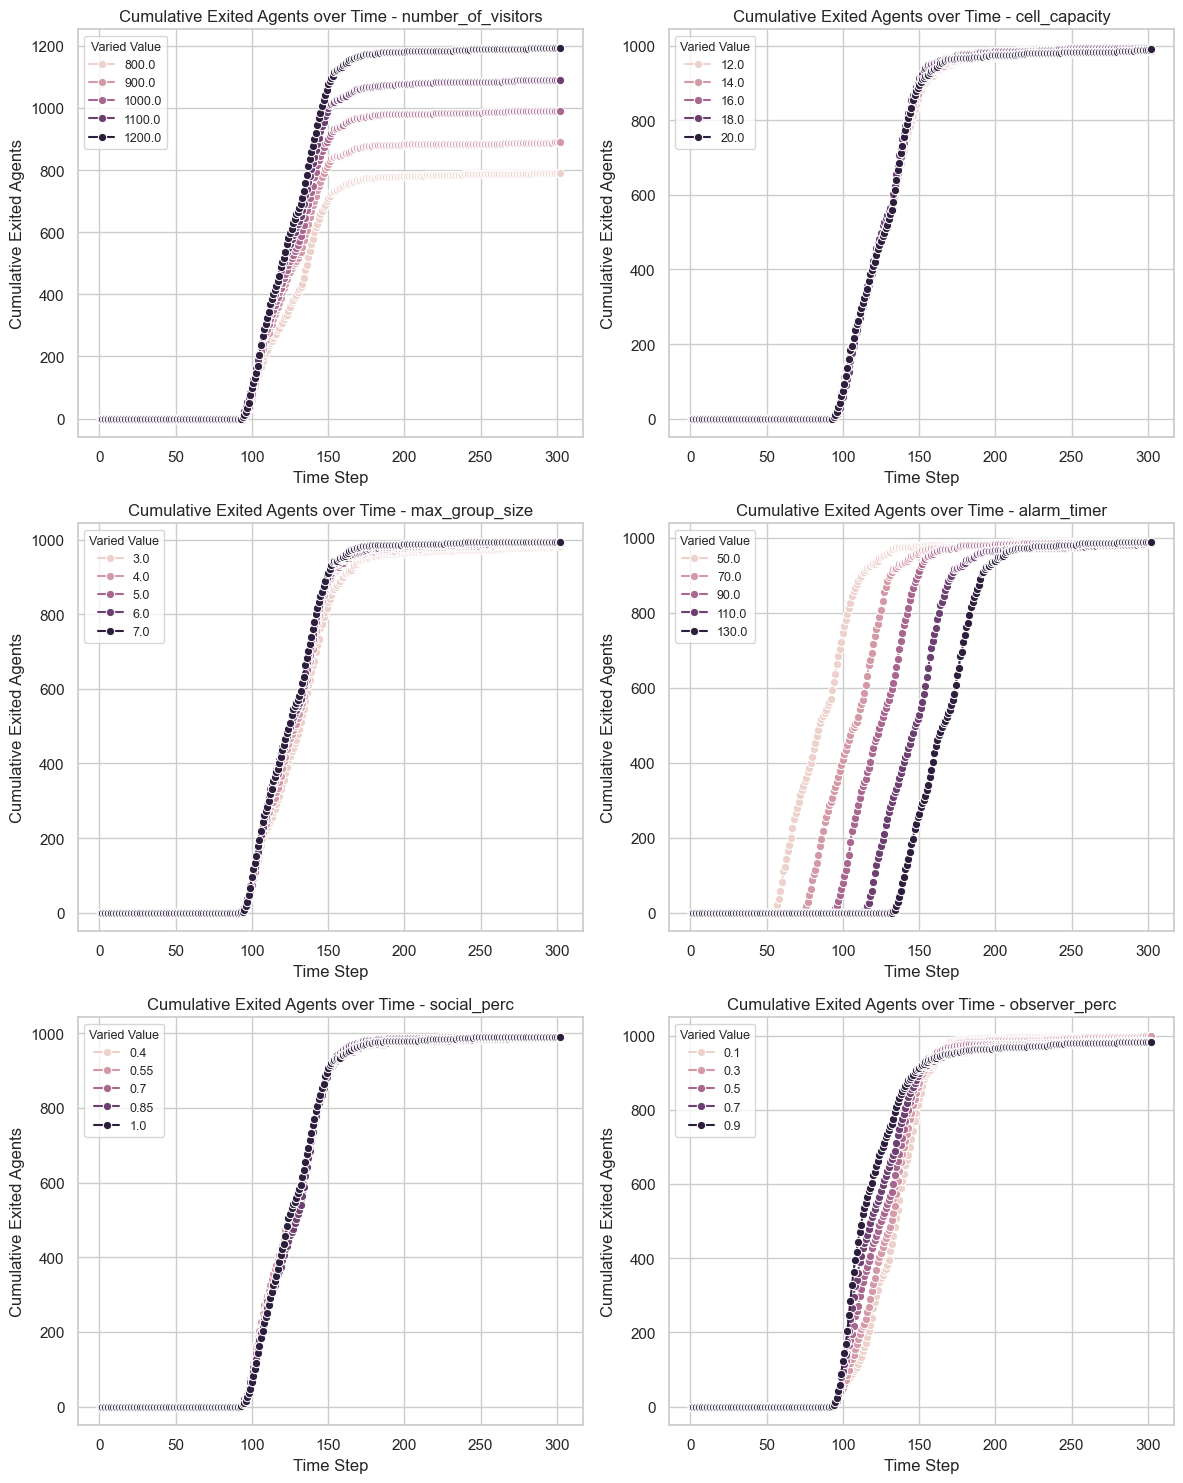

In [6]:
df_cum_agents = df_filtered.copy()

# Get unique parameters
parameters = df_cum_agents['varied_parameter'].unique()

# Set plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(3,2, figsize=(12,15))

# Iterate through each parameter and create plots
for i, param in enumerate(parameters):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    # Filter data for the current parameter
    subset = df_cum_agents[df_cum_agents['varied_parameter'] == param]
    
    # Plot lines for each varied value
    sns.lineplot(
        data=subset,
        x='time_step',
        y='Cumulative Exited Agents',
        hue='varied_value',
        marker='o',
        ax=ax
    )
    
    # Customize the plot
    ax.set_title(f'Cumulative Exited Agents over Time - {param}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Cumulative Exited Agents')
    
    # Modify the legend with smaller font sizes
    legend = ax.legend(title='Varied Value', fontsize=9)  # Set legend labels font size
    legend.get_title().set_fontsize(9)  # Set legend title font size

plt.tight_layout()    
plt.show()

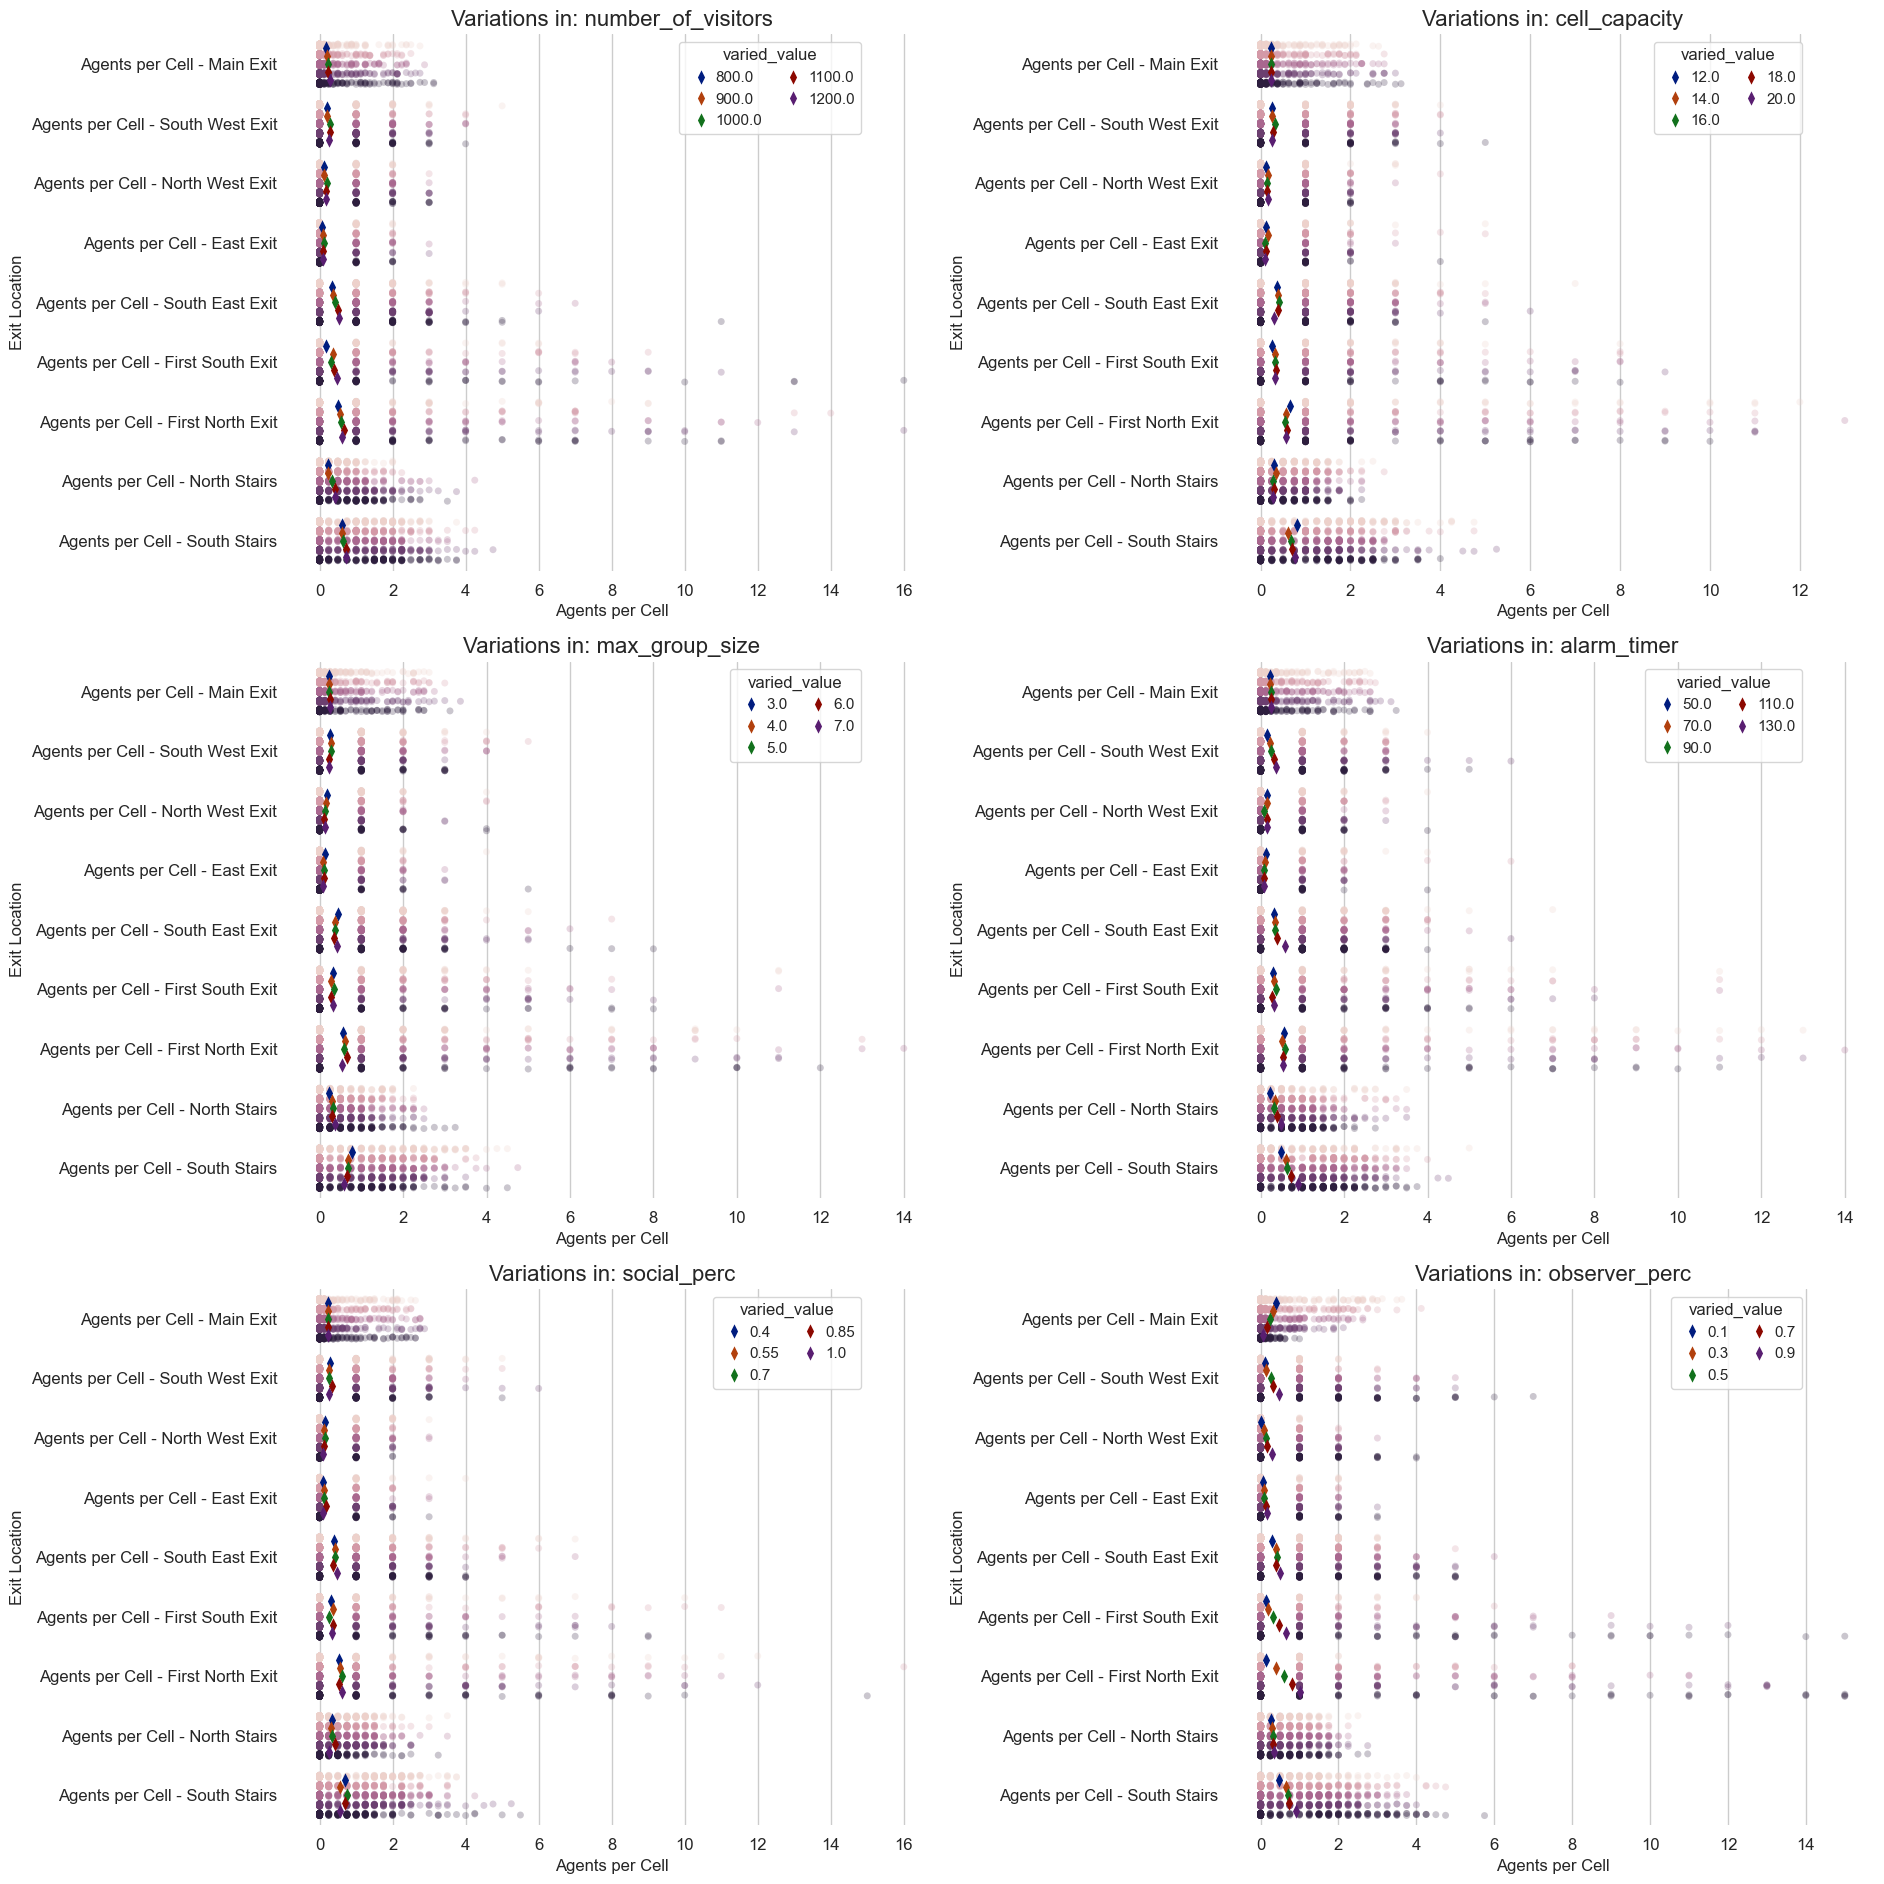

In [7]:
df_exit_density = df_filtered.copy()

variables_to_plot = [
    "Agents per Cell - Main Exit",
    "Agents per Cell - South West Exit",
    "Agents per Cell - North West Exit",
    "Agents per Cell - East Exit",
    "Agents per Cell - South East Exit",
    "Agents per Cell - First South Exit",
    "Agents per Cell - First North Exit",
    "Agents per Cell - North Stairs",
    "Agents per Cell - South Stairs"
]

fig, axes = plt.subplots(3, 2, figsize=(19, 19))

# Iterate through each varied parameter and create a plot
for i,var in enumerate(df_exit_density['varied_parameter'].unique()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    df_sub = df_exit_density[df_exit_density['varied_parameter'] == var]
    
    # Melt the dataframe to long-form or tidy representation for seaborn
    df_melted = df_sub.melt(id_vars=["varied_value"], value_vars=variables_to_plot, var_name="measurement", value_name="value")
    
    sns.stripplot(
        data=df_melted, x="value", y="measurement", hue="varied_value",
        dodge=True, alpha=.25, zorder=1, legend=False, ax=ax
    )
    sns.pointplot(
        data=df_melted, x="value", y="measurement", hue="varied_value",
        dodge=.8 - .8 / 3, palette="dark", errorbar=None,
        markers="d", markersize=4, linestyle="none", ax=ax
    )
    
    ax.set_title(f"Variations in: {var}", fontsize=16)
    ax.set_xlabel("Agents per Cell")
    ax.set_ylabel("Exit Location")
    ax.tick_params(axis='both', which='major', labelsize=12)
    sns.despine(bottom=True, left=True)
    sns.move_legend(ax, loc="upper right", bbox_to_anchor=(0.9,1), ncol=2, frameon=True, columnspacing=1, handletextpad=0)

plt.tight_layout()    
plt.show()

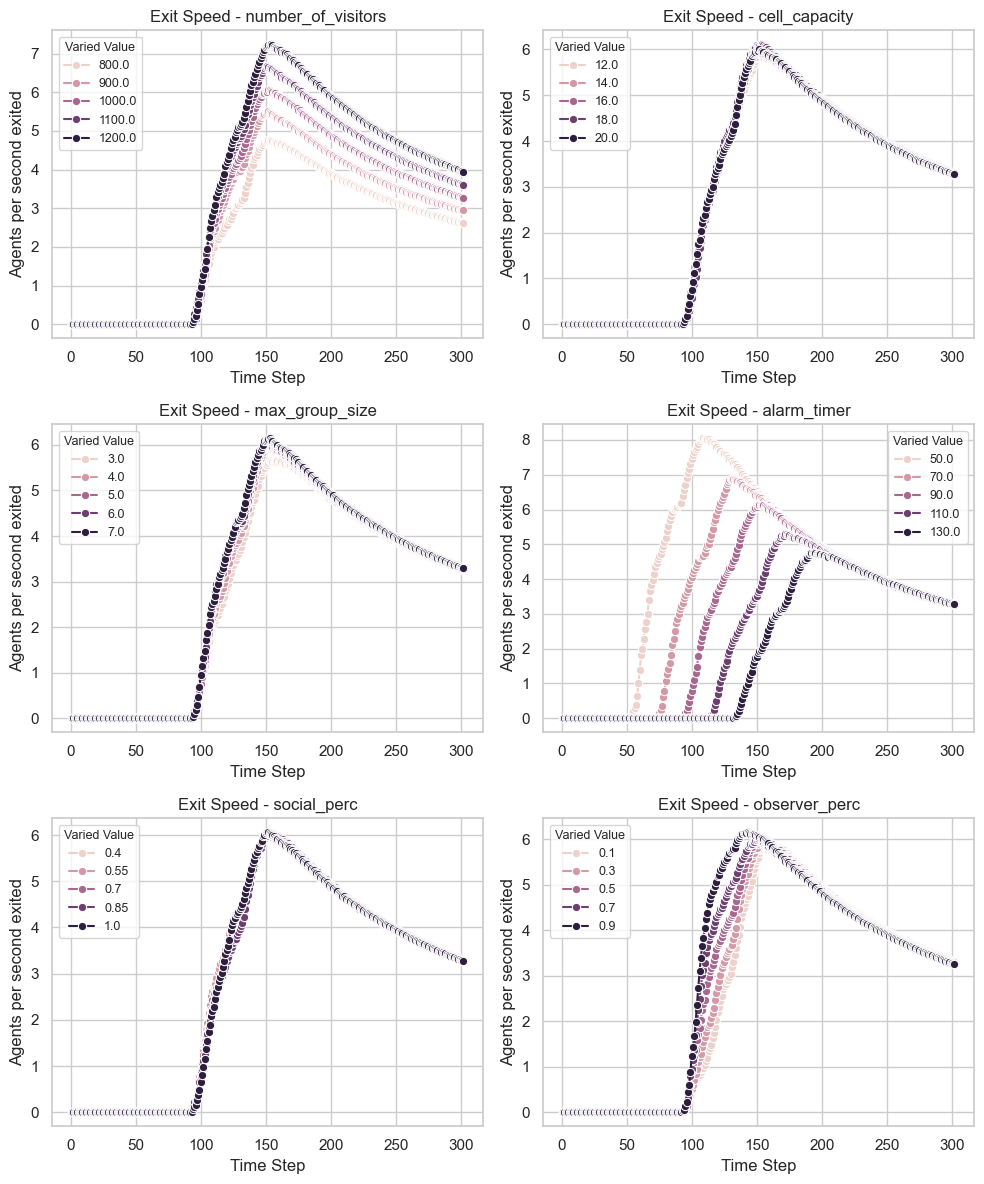

In [92]:
df_exit_speed = df_filtered.copy()

# Get unique parameters
parameters = df_exit_speed['varied_parameter'].unique()

# Set plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(3,2, figsize=(10,12))

# Iterate through each parameter and create plots
for i, param in enumerate(parameters):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    # Filter data for the current parameter
    subset = df_exit_speed[df_exit_speed['varied_parameter'] == param]
    
    # Plot lines for each varied value
    sns.lineplot(
        data=subset,
        x='time_step',
        y='Exit Speed',
        hue='varied_value',
        marker='o',
        ax=ax
    )
    
    # Customize the plot
    ax.set_title(f'Exit Speed - {param}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Agents per second exited')
    # Modify the legend with smaller font sizes
    legend = ax.legend(title='Varied Value', fontsize=9)  # Set legend labels font size
    legend.get_title().set_fontsize(9)  # Set legend title font size

plt.tight_layout()    
plt.show()

# Results analysis

## Base case

In [119]:
df = pd.read_csv('./data/model_data_basecase.csv')
df['timestep'] = df.groupby(['run_id']).cumcount() + 1
df['Exit Speed'] = df['Cumulative Exited Agents'] / df['timestep']

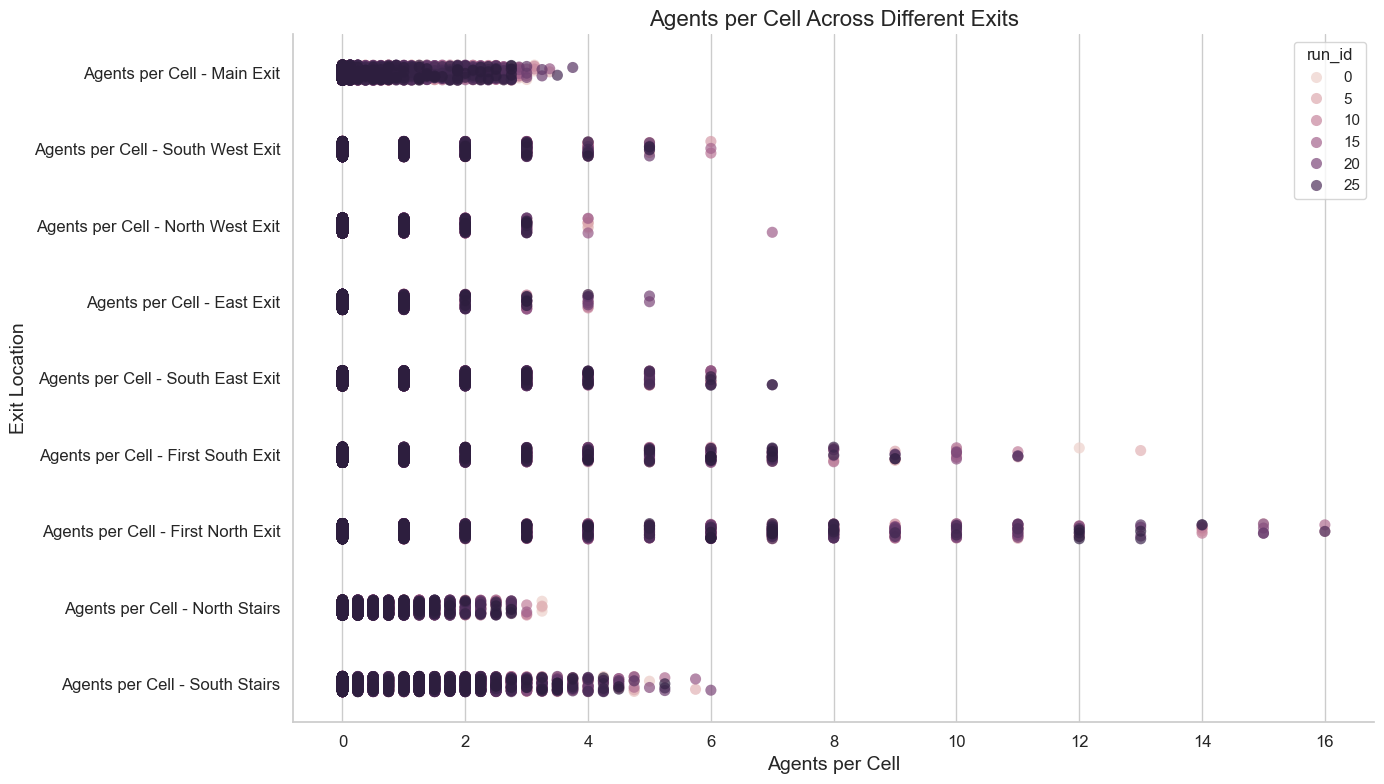

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare the DataFrame
df_base_case = df.copy()

# 2. Define the variables to plot
variables_to_plot = [
    "Agents per Cell - Main Exit",
    "Agents per Cell - South West Exit",
    "Agents per Cell - North West Exit",
    "Agents per Cell - East Exit",
    "Agents per Cell - South East Exit",
    "Agents per Cell - First South Exit",
    "Agents per Cell - First North Exit",
    "Agents per Cell - North Stairs",
    "Agents per Cell - South Stairs"
]

# 3. Transform the DataFrame to long-form
df_melted = df_base_case.melt(
    id_vars = 'run_id',
    value_vars=variables_to_plot,
    var_name='Exit Location',
    value_name='Agents per Cell'
)

# 4. Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 5. Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# 6. Create the stripplot
ax = sns.stripplot(
    data=df_melted,
    y='Exit Location',
    x='Agents per Cell',
    hue='run_id',
    alpha=0.7,
    jitter=True,
    size=8
)

# 7. Customize the plot
plt.title('Agents per Cell Across Different Exits', fontsize=16)
plt.xlabel('Agents per Cell', fontsize=14)
plt.ylabel('Exit Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 8. Remove the top and right spines for a cleaner look
sns.despine()

# 9. Optimize layout and display
plt.tight_layout()
plt.show()


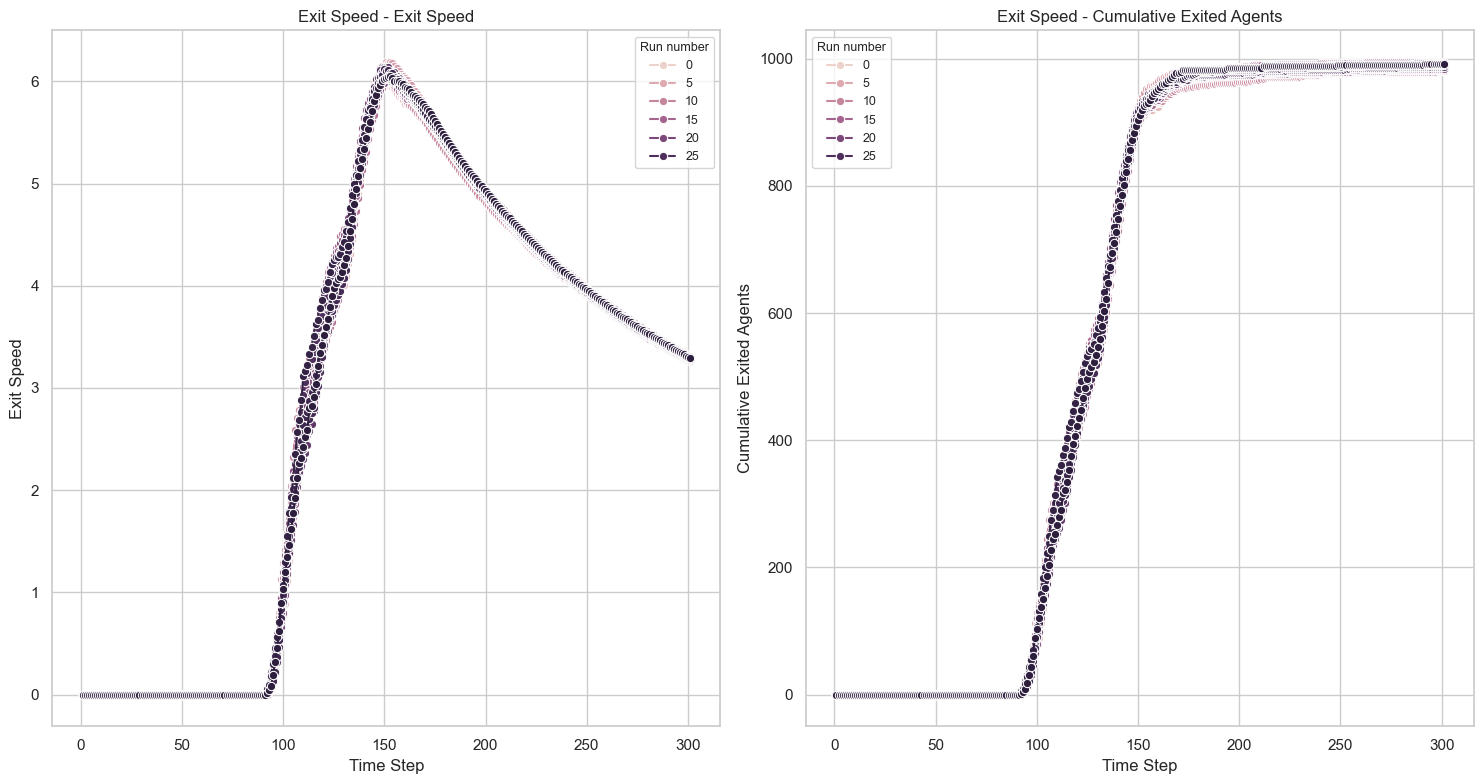

In [126]:
# Get unique parameters
parameters = ['Exit Speed', 'Cumulative Exited Agents']

# Set plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(1,2, figsize=(15,8))

# Iterate through each parameter and create plots
for i, param in enumerate(parameters):
    ax = axes[i]
    # Filter data for the current parameter
    subset = df[param]
    
    # Plot lines for each varied value
    sns.lineplot(
        data=df,
        x='timestep',
        y=param,
        hue='run_id',
        marker='o',
        ax=ax
    )
    
    # Customize the plot
    ax.set_title(f'Exit Speed - {param}')
    ax.set_xlabel('Time Step')
    
    # Modify the legend with smaller font sizes
    legend = ax.legend(title='Run number', fontsize=9)  # Set legend labels font size
    legend.get_title().set_fontsize(9)  # Set legend title font size
plt.tight_layout()    
plt.show()

## Scenario analysis

In [57]:
# Define the output variables to plot
output_vars = [
    "Agents per Cell - Main Exit",
    "Agents per Cell - South West Exit",
    "Agents per Cell - North West Exit",
    "Agents per Cell - East Exit",
    "Agents per Cell - South East Exit",
    "Agents per Cell - First South Exit",
    "Agents per Cell - First North Exit",
    "Agents per Cell - North Stairs",
    "Agents per Cell - South Stairs",
    "Cumulative Exited Agents",
    "Exit Speed"
]

# Create a mapping to rename variables by removing 'Agents per Cell - '
rename_mapping = {
    var: var.replace("Agents per Cell - ", "") for var in output_vars if "Agents per Cell - " in var
}
rename_mapping["Cumulative Exited Agents"] = "Cumulative Exited Agents"  # Keep as is
rename_mapping["Exit Speed"] = "Exit Speed"  # Keep as is

# Initialize an empty list to store dataframes
df_list = []

# Loop through scenario files 1 to 12
for i in range(1, 13):
    file_pattern = f"./data/model_data_scenario{i}_all_runs.csv"
    # Read the CSV file
    df = pd.read_csv(file_pattern)
    
    # Rename the columns to remove 'Agents per Cell - '
    df.rename(columns=rename_mapping, inplace=True)
    # Add 'timestep' column (index starts at 0, so add 1)
    df['timestep'] = df.index + 1
    df['Exit Speed'] = df['Cumulative Exited Agents'] / df['timestep']
    
    # Append to the list
    df_list.append(df)

# Read the CSV file
df = pd.read_csv(f"./data/model_data_basecase.csv")
# Rename the columns to remove 'Agents per Cell - '
df.rename(columns=rename_mapping, inplace=True)
# Add 'timestep' column (index starts at 0, so add 1)
df['timestep'] = df.index + 1
df['Exit Speed'] = df['Cumulative Exited Agents'] / df['timestep']
df['scenario_id'] = 'Base'
# Append to the list
df_list.append(df)
# Concatenate all dataframes
combined_df = pd.concat(df_list, ignore_index=True)

# List of renamed variables for plotting
renamed_vars = list(rename_mapping.values())

# Aggregate by 'scenario_id' and 'timestep', averaging over 'replication_id'
aggregated_df = combined_df.groupby(['scenario_id'])[renamed_vars].mean().reset_index()


In [58]:
aggregated_df

,scenario_id,Main Exit,South West Exit,North West Exit,East Exit,South East Exit,First South Exit,First North Exit,North Stairs,South Stairs,Cumulative Exited Agents,Exit Speed
0,1,0.190163,0.618433,0.121854,0.115784,0.388411,0.327483,0.575607,0.321054,0.663162,579.808940,0.302277
1,2,0.226531,0.447130,0.053532,0.079249,0.435541,0.195364,0.559382,0.267936,0.885955,536.445585,0.279020
2,3,0.099103,0.957285,0.176049,0.117219,0.311810,0.697682,0.605077,0.286534,1.101987,614.433002,0.324084
3,4,0.267757,0.263245,0.239294,0.114128,0.478698,0.117770,0.248896,0.428284,1.076711,535.387969,0.280144
4,5,0.186603,0.654084,0.185320,0.144260,0.317219,0.469647,0.392053,0.345971,1.157147,598.900662,0.316679
5,6,0.140328,0.907285,0.456291,0.124393,0.380795,0.271854,0.465232,0.303504,0.552483,613.942605,0.324895
6,7,0.127097,0.667881,0.070199,0.112914,0.371854,0.607395,0.838962,0.243212,0.537252,616.449227,0.325087
7,8,0.150386,1.018764,0.080464,0.082230,0.436976,0.250442,0.531236,0.281457,0.881540,549.509934,0.289144
8,9,0.237003,0.582340,0.210044,0.088852,0.280905,0.088852,0.184768,0.449614,1.299062,496.386976,0.258520
9,10,0.243171,0.451876,0.223951,0.099448,0.453422,0.154194,0.350662,0.310099,0.906429,561.904084,0.295660


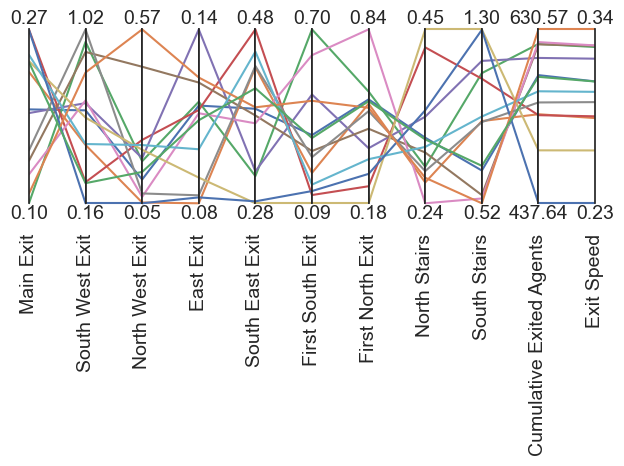

In [64]:
# Select specific columns from the reference_set to create the outcomes DataFrame
outcomes = aggregated_df.loc[:, renamed_vars]

# Determine the limits for the parallel coordinates plot based on the selected outcomes
limits = parcoords.get_limits(outcomes)

# Create a ParallelAxes object with the determined limits
axes = parcoords.ParallelAxes(limits)

# Plot the outcomes DataFrame on the parallel coordinates axes
axes.plot(outcomes)

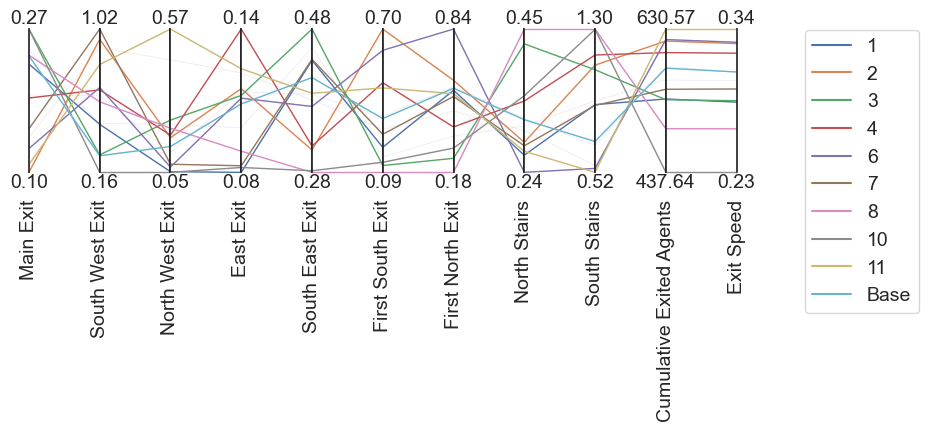

In [80]:
# Set the color palette for plotting
colors = sns.color_palette()

# Combine all outcomes into a single DataFrame
all_data = pd.DataFrame({k: v for k, v in outcomes.items()})

# Get unique indices for the maximum and minimum values across all objectives
indices = pd.concat([all_data.idxmax(), all_data.idxmin()]).unique()
indices = np.unique(np.append(indices, 12)) 
# Determine the limits for the parallel coordinates plot
limits = parcoords.get_limits(all_data)

# Create a ParallelAxes object with the determined limits
paraxes = parcoords.ParallelAxes(limits)

# Plot all data in light grey for background
paraxes.plot(all_data, color='lightgrey', lw=0.5, alpha=0.5)

# Plot the unique maximum and minimum lines with different colors
for i, (index, row) in enumerate(all_data.iloc[indices].sort_index().iterrows()):
    if index != 12:
        paraxes.plot(row, color=colors[i], lw=1, label=str(index))
    else:
        paraxes.plot(row, color=colors[i], lw=1, label='Base')

# Create a legend to identify the unique lines
paraxes.legend()

# Get the current figure and set its size
fig = plt.gcf()
fig.set_size_inches((8, 4))

# Display the plot
plt.show()